<div style='text-align: center; font-size: 30px;'>
  <b>Computer Programming project - <i>Leonardo Tonelli 3216378</i></b>
</div>


**Instructions**
- To Run the whole Notebook takes around 15 minutes(there are 2/3 lines that make 80% of that time), if this is a problem you can still access all the codes and observations but you will need to open the GRAPH word document to see the figures referred in the notebook.
- Before starting to open the tasks you should run the "Imports and generation function" section
- The accept_with_probability function is in the imports because it will be used in each task, then we will define it once for all
- Running the task 1.1 (which is the class for the problem, called OPT) is crucial to make everything smooth
- Each section is already run and ready, you should see every output already. If you want to re-run the code, just make sure that the "testing function" of the respective section and the imports were run. Be careful to some lines of codes (that I will specify) that take quite a bit of time to be executed again.
- To visualize the full functions click on the "drop-down" arrow to the left of the "def" notation
- Some function callings cells are shortened to make it more appealing, to expand it just click on the line on the farest left of the hidden cell
- All the studies are made without modifying the move proposal specified in the project assignment (a movement of 1) except for the very last section

#### **Imports and generation function**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
import time

### ACCEPT WITH PROBABILITY BASED ON BOLTZMANN DISTRIBUTION
def accept_with_prob(delta_cost, beta):
    if delta_cost <= 0:
        return True

    if beta == np.inf:
        return False

    prob = np.exp(-beta*delta_cost)

    return np.random.random() < prob

### GENERATION FUNCTION
def generate_data(n, seed):
    if type(seed) != str:
        raise TypeError("The seed should be the string representing your ID")
    if type(n) != int:
        raise TypeError("The dimension of the problem should be an integer value")
    if n%2 != 0:
        raise ValueError("The dimension of the problem should be even!!")

    aggregate_counter = 0
    for char in seed:
        aggregate_counter += int(char)

    aggregate_counter = 10*aggregate_counter
    marginal_diff = int(aggregate_counter)%n
    bsize = 12 + int(np.floor(n**(1/2)))
    if (bsize%2)!=0:
        bsize=bsize-1

    if (marginal_diff<bsize+4):
        marginal_diff = bsize+4
    if (marginal_diff > (n-bsize-4)):
        marginal_diff = n-bsize-4
    if ((marginal_diff > n/2 - bsize-5) and (marginal_diff < n/2+bsize+5)):
        marginal_diff = int(n/2-bsize-5)

    c_marginal_diff = n-marginal_diff

    b1 = -100 + np.random.randn(bsize, bsize)
    b2 = -50 + np.random.randn(bsize, bsize)


    f_values = np.zeros((n,n), dtype=np.float32)
    f_values = 1+ 0.05*np.random.randn(n,n)
    f_values[marginal_diff-bsize//2:marginal_diff+bsize//2, c_marginal_diff-bsize//2:c_marginal_diff+bsize//2] = b1
    f_values[c_marginal_diff-bsize//2:c_marginal_diff+bsize//2, marginal_diff-bsize//2:marginal_diff+bsize//2] = b2
    return f_values

data = generate_data(100, "3216378")

#### **Task 1**

##### **1.1 Problem Class**

In [ ]:
### VISUALIZATION FUNCTION
def visualize_data2D_point(data, x0, y0):
    matrix = np.transpose(data) ## TRANSPOSED BECAUSE IN THIS WAY ROW INDEX IN ON THE X AXIS AND COL INDEX ON THE Y-AXIS
    plt.imshow(matrix, cmap='winter', origin="lower")
    plt.plot(x0, y0, marker="o", color="red")
    plt.colorbar(label='Value')
    plt.xlabel('Row Index')
    plt.ylabel('Column Index')
    plt.title('Matrix Visualization')
    plt.show()

class OPT:
    def __init__(self, data):
        self.data = data
        self.n = data.shape[0]
        self.x0 = -1
        self.y0 = -1

    def init_config(self, seed=None):
        if seed is not None:
            np.random.seed(seed)
        self.x0 = np.random.choice(np.arange(self.n))
        self.y0 = np.random.choice(np.arange(self.n))

    def cost(self):
        return self.data[self.x0, self.y0]

    def propose_move(self):
        i = self.x0
        j = self.y0
        n = self.data.shape[0]
        x_prop = np.random.choice([(i-1) % n, (i+1) % n])
        y_prop = np.random.choice([(j-1) % n, (j+1) % n])
        return x_prop, y_prop

    def compute_delta_cost(self, move):
        x_prop, y_prop = move
        old_c = self.cost()
        new_c = self.data[x_prop, y_prop]
        return new_c - old_c

    def accept_move(self, move):
        x_prop, y_prop = move
        self.x0 = x_prop
        self.y0 = y_prop

    def copy(self):
        return deepcopy(self)

    def display(self):
        plt.clf()
        data = self.data
        x0 = self.x0
        y0 = self.y0
        visualize_data2D_point(data, x0, y0)
        plt.show()
        plt.pause(0.01)

probl = OPT(data)


##### **1.2 Standard simulated annealing function**

In [ ]:
### ACCEPT WITH PROBABILITY BASED ON BOLTZMANN DISTRIBUTION
def accept_with_prob(delta_cost, beta):
    if delta_cost <= 0:
        return True

    if beta == np.inf:
        return False

    prob = np.exp(-beta*delta_cost)

    return np.random.random() < prob

### SIMULATED ANNEALING STANDARD FUNCTION
def simann(probl, beta0=0.1, beta1=10., anneal_steps=10, mcmc_steps=10, seed=None):

    if seed is not None:
        np.random.seed(seed)

    probl.init_config()
    cx = probl.cost()
    print(f"Initial cost is c = {cx}")

    best_c = cx
    best_probl = probl.copy()

    betas = np.zeros(anneal_steps)
    betas[:-1] = np.linspace(beta0, beta1, anneal_steps-1)
    betas[-1] = np.inf

    for beta in betas:
        accepted_moves = 0
        for t in range(mcmc_steps):
            move = probl.propose_move()
            delta_c = probl.compute_delta_cost(move)

            if accept_with_prob(delta_c, beta):
                accepted_moves += 1
                probl.accept_move(move)
                cx += delta_c
                # coord = probl.x0, probl.y0
                # print(f"Coordinates explored = {coord}")

                if best_c >= cx:
                    best_c = cx
                    best_probl = probl.copy()

                    ## UNCOMMENT TO PRINT BEST COORDINATES
                    # best_coord = best_probl.x0, best_probl.y0
                    # print(f"New coordinates = {best_coord}, New best cost = {best_c}")

                    ## UNCOMMENT TO VISUALIZE THE BEST PROBLEM (DOES NOT OVERLAP THE PLOTS IN JUPYTER NOTEBOOK)
                    # best_probl.display()

        # UNCOMMENT TO PRINT VARIABLES DURING THE RUN
        # print(f"beta= {beta}, accept_freq= {accepted_moves/mcmc_steps}, best_c={best_c}")

    ## UNCOMMENT TO VISUALIZE THE BEST PROBLEM (DOES NOT OVERLAP THE PLOTS IN JUPYTER NOTEBOOK)
    # best_probl.display()
    best_c = best_probl.cost()
    print(f"Best Cost = {best_c}")

    return best_probl, best_c

Test

In [ ]:
probl = OPT(data)
simann(probl, 0.1, 10, anneal_steps=100, mcmc_steps = 200, seed = None)

Initial cost is c = 1.0182328673582894
Best Cost = -52.98268059807398


(<__main__.OPT at 0x2a6c9444190>, -52.98268059807398)

#### **Task 2**

- **Mathematically**, if I don't allow the jump from the borders the symmetry property of our proposal move system is broken. A simulated annealing procedure (using montecarlo chains to reproduce a probability distribution) must have a proposal scheme which is symmetric, that means that the chance that a proposed move x' gets proposed given a position x, must be the same as the chance that x gets proposed given x'. And if we don't allow the jump by simply treating the borders as exception cases, the probability to get to a border node from a point (non-border) x is 1/4th while the probability to go back to the point x will be 1/2lf. Cannot be allowed without changing the code.
- **Implementation-wise**, if we don't use the modulo operation we will receive an index error when reaching a point on the edge and proposing a move that is out of bound given the shape of the matrix.


To not allow it and still be consistent with the simulated annealing (with mcmc) process, we should either add a layer of elements on the borders that have infinity cost or change the calculation of the probability of acceptance.
- The first case is constistent because it solves the index error without modifying the probabilities of the proposal scheme and without changing the problem. That's because the probability that a point of the "new border" is going to be accepted is 0 (since the delta cost will be infinite) but the proposal procedure will remain symmetric for the "explorable states". The part to modify would be the initial matrix in the class and the starting point that cannot be a border point.
- The second solution is instead to modify the calculation of the acceptance probability using more general formula of mcmc. Which is $A_{ij} = \min\left(1, \frac{C_{ji}p_i}{C_{ij}p_j}\right)$. With $C_{ij}$ being the proposal probability from state $i$ to state $j$. Then the part to modify would be the accept_with_prob function that if the move is proposed by a point adjacent to the border, it uses this more general formula to compute the probability of acceptance. And indeed also the move proposal in the class should treat the border cases as exceptions, avoiding proposed moves that go outside the scope of the matrix


#### **Task 3**

To study the performance of the algorithm as the temperature changes, we can store the best cost found in each temperature(1/beta) in different runs of the algorithm. We will store these results in a matrix that has as rows the repetitions of the algorithm and as columns the number of annealing steps (betas), in this way we can take the mean of all the columns to result in an array of average best costs in each temperature of the algorithm. The constant variables in the following experiments are: beta0=0.001, beta1=10., anneal_steps=100, mcmc_steps=200 and n=100. This procedure will allow us to make observations on the behavior of the best cost as the temperature changes within our given range.

##### **3.1 Test functions**

In [ ]:
### SIMULATED ANNEALING FUNCTION THAT RETURNS COSTS AT EACH BETA
def simann_3(probl, beta0=0.001, beta1=10., anneal_steps=100, mcmc_steps=200, seed=None):
    if seed is not None:
        np.random.seed(seed)

    probl.init_config()
    cx = probl.cost()

    ## UNCOMMENT TO PRINT THE STARTING COORDINATES
    # print(probl.x0, probl.y0)

    best_c = cx

    betas = np.zeros(anneal_steps)
    betas[:-1] = np.linspace(beta0, beta1, anneal_steps-1)
    betas[-1] = np.inf
    costs = []

    for beta in betas:
        accepted_moves = 0
        temp_costs = []
        for t in range(mcmc_steps):
            move = probl.propose_move()
            delta_c = probl.compute_delta_cost(move)

            if accept_with_prob(delta_c, beta):
                accepted_moves += 1
                probl.accept_move(move)
                cx += delta_c
                # temp_costs.append(cx)

                if best_c >= cx:
                    best_c = cx
        # costs.append(np.mean(np.array(temp_costs)))
        costs.append(best_c)
        ## UNCOMMENT TO PRINT THE CHANGE AFTER EACH ITERATION
        # print(f"beta= {beta}, accept_freq= {accepted_moves/mcmc_steps}, best_c={best_c}")

    return betas, costs

### FUNCTION THAT COLLECTS THE MEAN RESULTS OVER N TRIALS
def get_mean_results(probl, iterations=20, anneal_steps=100):
    costs = np.zeros((iterations, anneal_steps))
    for i in range(iterations-1):
        betas, c = simann_3(probl, anneal_steps=anneal_steps)
        costs[i,:] = c
    avg_costs = np.mean(costs, axis=0)
    return betas, avg_costs

### FUNCTION THAT PLOTS THE RESULT
def plot_task3(betas, avg_costs):
    plt.plot(betas, avg_costs, color="purple", linestyle='-', linewidth=2, markersize=8, label='Average Cost')
    plt.xlabel("Betas")
    plt.ylabel("Cost")
    plt.title("Average Best Cost over 100 Iterations at Each Temperature of the Annealing Procedure")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()

***Generate data***

In [ ]:
betas, avg_costs = get_mean_results(probl, iterations=100, anneal_steps=200)


##### **3.2 Plot and considerations (Fig.1)**

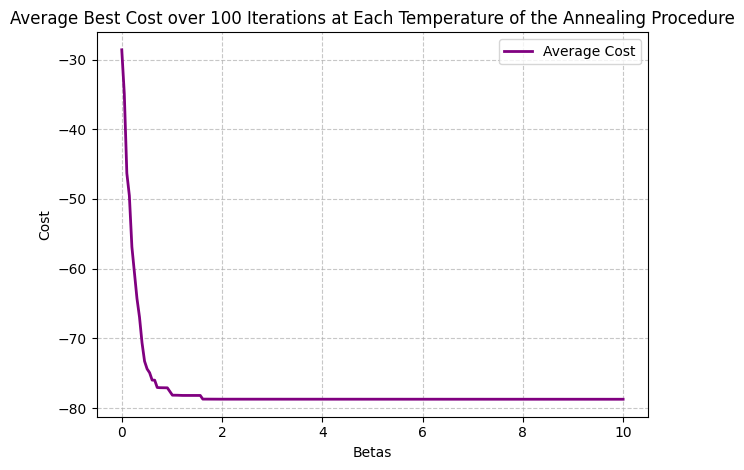

In [ ]:
plot_task3(betas, avg_costs)

- We can observe how the average best cost selected decreases drastically in the first 1/10th of the annealing procedure, and then remains pretty much steady for all the rest of the steps. This hints that our exploration most of the time finds a position that make the best cost drop very fast, and after that moment (that for n=100 is almost always at a distance of few annealing steps from the beginning) our point stays in a region of very similar costs till convergence.
- About the descent of the cost, we could intuitively understand that is not really gradual as the graph could hint, in fact given that the plot describes the average cost over the runs and that our move is restricted to the neighbour point, the descent can be also (and it is in this case) radical.
- Now without knowing neither the actual value of minimum nor the best costs of those runs, we could not tell if the average convergence cost of -80 is actually a optimal cost or it's just the result of the average of other local solutions. However, if we print also the solutions of our algorithm in those runs, we can see that the average is -80 because there are actually two regions where our point converges most of the times, around -50 and around -100.

#### **Task 4**

To measure the convergence time and the convergence success we need to specify an annealing function that stops as the convergence happens and returns both the time of execution the convergence success. As stopping criteria we can choose the nullity of the acceptance rate, this in fact is exactly equal to zero if and only if during all the mcmc steps all the move propositions were discarded: which means that our point doesn't have very low other chance to escape the position it is in, the cost converged into a result. In the following experiment we defined as successful if the result is in a neighbor of -100 and not otherwise, since we know that the minima is around -100 (as the text specifies).

To make our result statistically significant we collect a sample of 20 results for each n and then take the average results, so we can deviate from eventual exceptions and make general considerations.

##### **4.1 Test functions**

In [ ]:
### SIMULATED ANNEALING FUNCTION THAT RETURNS CONVERGENCE SUCCESS AND CONVERGENCE TIME
def simann_4(probl, beta0=0.001, beta1=10., anneal_steps=100, mcmc_steps=200, seed=None):
    if seed is not None:
        np.random.seed(seed)

    t0 = time.time()
    probl.init_config()
    cx = probl.cost()

    ## UNCOMMENT TO PRINT THE STARTING COORDINATES
    # print(probl.x0, probl.y0)

    best_c = cx

    betas = np.zeros(anneal_steps)
    betas[:-1] = np.linspace(beta0, beta1, anneal_steps-1)
    betas[-1] = np.inf

    for beta in betas:
        accepted_moves = 0
        for t in range(mcmc_steps):
            move = probl.propose_move()
            delta_c = probl.compute_delta_cost(move)

            if accept_with_prob(delta_c, beta):
                accepted_moves += 1
                probl.accept_move(move)
                cx += delta_c

                if best_c >= cx:
                    best_c = cx


        ## UNCOMMENT TO PRINT THE CHANGE AFTER EACH ITERATION
        # print(f"beta= {beta}, accept_freq= {accepted_moves/mcmc_steps}, best_c={best_c}")

        acceptance_frequency = accepted_moves/mcmc_steps

        if acceptance_frequency == 0:
            convergence_success = (abs(best_c + 100) < 5)
            t1 = time.time()
            execution_time = t1 - t0
            return best_c, execution_time, convergence_success

    convergence_success = (abs(best_c + 100) < 5)
    t1 = time.time()
    execution_time = t1 - t0
    return best_c, execution_time, convergence_success

### FUNCTION TO GENERATE THE MEAN RESULTS OVER SOME ITERATIONS FOR A GIVEN N
def get_mean_results(probl, iterations=20):
    times = np.zeros(iterations-1, dtype=float)
    results = np.zeros(iterations-1, dtype=int)
    for i in range(iterations-1):
        best_c, execution_time, convergence_success = simann_4(probl)
        times[i] = execution_time
        results[i] = convergence_success
    t = np.mean(times)
    m = np.mean(results)
    return t, m

### FUNCTION TO GET THE DATA FOR ALL NS IN AN ARRAY OF PROBLEM SIZES
def get_data(ns, iterations=20):
    l = len(ns)
    probls_ns = [OPT(generate_data(n, "3216378")) for n in ns]
    avg_times = np.zeros(l)
    avg_performances = np.zeros(l)
    for i in range(l):
        t, p = get_mean_results(probls_ns[i], iterations)
        avg_times[i] = t
        avg_performances[i] = p
    return avg_times, avg_performances

### FUNCTION TO PLOT THE RESULTS ON TWO GRAPHS IN THE SAME FIGURE
def plot_comparison_graphs(ns, avg_times, avg_performances):
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

    # Plot the first graph
    ax1.plot(ns, avg_times, label='Convergence time', color='red')
    ax1.set_xlabel('Size of matrix')
    ax1.set_ylabel('Time (in s)')
    ax1.legend()

    # Plot the second graph
    ax2.plot(ns, avg_performances, label='Success rate', color='green')
    ax2.set_xlabel('Size of matrix')
    ax2.set_ylabel('Success rate (%)')
    ax2.legend()

    # Customize the layout
    plt.suptitle('Comparison')
    plt.show()

##### **4.2 Plots and considerations (Fig.2)**

***Samples generation***

In [ ]:
ns = [100,200,300,400,500,600,700,800,1000]
avg_times, avg_performances = get_data(ns, iterations=50)

***Plot the results***

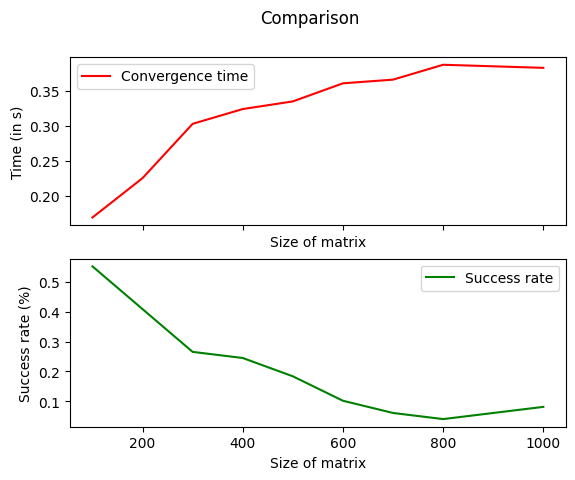

In [ ]:
plot_comparison_graphs(ns, avg_times, avg_performances)

***Considerations***

- The time of convergence increases with the size of the matrix, then the exploration narrows down to a specific point with more struggle as the matrix grows.
- About the success rate, this decreases as n changes, therefore the problem becomes more and more difficult for our algorithm as the size increases.
- What changes for our algorithm as n increases is definitely the portion of matrix explored (if we maintain the same steps and the same move proposal), then
both observations hint that the proportion of the points of minima with respect to the matrix could possibily decrease as the size of the matrix grows, this will explain the fact that when the size of our exploration decreases the success drops as well as the probability to converge before that our annealing steps are terminated

##### **4.3 Extra comparisons with acceptance frequency and delta cost**

**Accepted Frequency in different ns**

Testing functions

In [ ]:
### FUNCTION THAT RETURNS ALSO THE ACCEPTANCE FREQUENCIES AND AVG DELTA COSTS (FROM TASK 5)
def simann5(probl, beta0=0.1, beta1=10., anneal_steps=100, mcmc_steps=200, seed=None):

    if seed is not None:
        np.random.seed(seed)

    probl.init_config()
    cx = probl.cost()
    best_c = cx
    betas = np.zeros(anneal_steps)
    betas[:-1] = np.linspace(beta0, beta1, anneal_steps-1)
    betas[-1] = np.inf
    accepted_freq = np.zeros(anneal_steps)

    for i in range(anneal_steps):
        beta = betas[i]
        accepted_moves = 0
        temp_delta = np.zeros(mcmc_steps)
        for t in range(mcmc_steps):
            move = probl.propose_move()
            delta_c = probl.compute_delta_cost(move)
            temp_delta[t] = delta_c

            if accept_with_prob(delta_c, beta):
                accepted_moves += 1
                probl.accept_move(move)
                cx += delta_c
                if best_c >= cx:
                    best_c = cx
        accepted_freq[i] = accepted_moves/mcmc_steps
    return betas, accepted_freq

### FUNCTION TO GENERATE THE MEAN RESULTS OVER SOME ITERATIONS FOR A GIVEN N OF SIMANN3
def get_mean_results4_1(probl, iterations=20, anneal_steps=100):
    acc_frequencies = np.zeros((iterations, anneal_steps))
    for i in range(iterations-1):
        b, f = simann5(probl, anneal_steps=anneal_steps)
        acc_frequencies[i,:] = f
    avg_freq = np.mean(acc_frequencies, axis=0)
    return b, avg_freq

### FUNCTION TO GET THE DATA FOR ALL NS IN AN ARRAY OF PROBLEM SIZES
def get_data4_1(ns, iterations=20, anneal_steps=100):
    l = len(ns)
    probls_ns = [OPT(generate_data(n, "3216378")) for n in ns]
    avg_freq = np.zeros((l, anneal_steps))
    for i in range(l):
        betas, f = get_mean_results4_1(probls_ns[i], iterations, anneal_steps=anneal_steps)
        b = betas
        avg_freq[i:] = f
    return b, avg_freq

### FUNCTION TO PLOT THE AVERAGE ACCEPTANCE RATES FOR EACH BETA AS N INCREASES
def plot_task4_1(x_array, y_matrix, ns):
    fig, ax = plt.subplots()
    num_rows = y_matrix.shape[0]

    for i in range(num_rows):
        y_row = y_matrix[i, :]
        ax.plot(x_array, y_row, label=f'n = {ns[i]}')

    ax.set_xlabel('Betas')
    ax.set_ylabel('Acceptance Rate')
    ax.set_title('Average acceptance rate for each beta as size n increases')
    ax.legend()
    plt.show()

***Generating the data***

In [ ]:
ns = [100,200,500,1000,2000,5000]
betas, avg_freq = get_data4_1(ns, iterations=30)

***Plotting the results (Fig.3)***

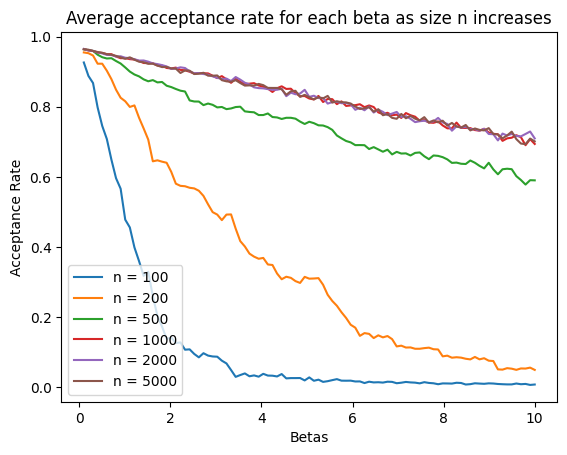

In [ ]:
plot_task4_1(betas, avg_freq, ns)

***Considerations (Fig.3)***

As we can see from the plot above, the acceptance rate during the change in the temperature decreases at fast pace for small sizes of the problem (100/200), while the descent becomes more and more linear as the n increases. This is a further confirmation of the increase in the complexity of the problem when the size of the matrix increases. Our process in fact, when n is relatively small, get to explore a good amount of space in the matrix and has higher probability to fall into a point where the acceptance probability drops. When n starts to increase, it's increasingly more difficult to find a local/optimal minimum, considering that maintaining the same annealing steps and the same move proposal, our process of exploration will be more limited with rispect to the size of the problem.

**Delta costs over betas in different ns**

In [ ]:
### SIMULATED ANNEALING FUNCTION THAT RETURNS COSTS AT EACH BETA (FROM TASK 3)
def simann_3(probl, beta0=0.001, beta1=10., anneal_steps=100, mcmc_steps=200, seed=None):
    if seed is not None:
        np.random.seed(seed)

    probl.init_config()
    cx = probl.cost()

    ## UNCOMMENT TO PRINT THE STARTING COORDINATES
    # print(probl.x0, probl.y0)

    best_c = cx

    betas = np.zeros(anneal_steps)
    betas[:-1] = np.linspace(beta0, beta1, anneal_steps-1)
    betas[-1] = np.inf
    costs = []

    for beta in betas:
        accepted_moves = 0
        temp_costs = []
        for t in range(mcmc_steps):
            move = probl.propose_move()
            delta_c = probl.compute_delta_cost(move)

            if accept_with_prob(delta_c, beta):
                accepted_moves += 1
                probl.accept_move(move)
                cx += delta_c
                # temp_costs.append(cx)

                if best_c >= cx:
                    best_c = cx
        # costs.append(np.mean(np.array(temp_costs)))
        costs.append(best_c)
        ## UNCOMMENT TO PRINT THE CHANGE AFTER EACH ITERATION
        # print(f"beta= {beta}, accept_freq= {accepted_moves/mcmc_steps}, best_c={best_c}")

    return betas, costs

### FUNCTION THAT COLLECTS THE MEAN RESULTS OVER N TRIALS OF SIMANN5
def get_mean_results4_2(probl, iterations=20, anneal_steps=100):
    costs = np.zeros((iterations, anneal_steps))
    for i in range(iterations-1):
        betas, c = simann_3(probl, anneal_steps=anneal_steps)
        costs[i,:] = c
    avg_cost = np.mean(costs, axis=0)
    return betas, avg_cost

### FUNCTION TO GET THE DATA FOR ALL NS IN AN ARRAY OF PROBLEM SIZES
def get_data4_2(ns, iterations=20, anneal_steps=100):
    l = len(ns)
    probls_ns = [OPT(generate_data(n, "3216378")) for n in ns]
    avg_costs = np.zeros((l, anneal_steps))
    for i in range(l):
        betas, avg_cost = get_mean_results4_2(probls_ns[i], iterations, anneal_steps=anneal_steps)
        avg_costs[i:] = avg_cost
    return betas, avg_costs

### FUNCTION TO PLOT THE AVERAGE BEST COST FOR EACH BETA AS N INCREASES
def plot_task4_2(x_array, y_matrix, ns):
    fig, ax = plt.subplots()
    num_rows = y_matrix.shape[0]

    for i in range(num_rows):
        y_row = y_matrix[i, :]
        ax.plot(x_array, y_row, label=f'n = {ns[i]}')

    ax.set_xlabel('Betas')
    ax.set_ylabel('Best costs')
    ax.set_title('Average best cost for each beta as size n increases')
    ax.legend()
    plt.show()

***Generating the data***

In [ ]:
ns = [100,200,500,1000,2000,5000]
betas, avg_costs = get_data4_2(ns, iterations=30, anneal_steps=100)

***Plotting the results (Fig.4)***

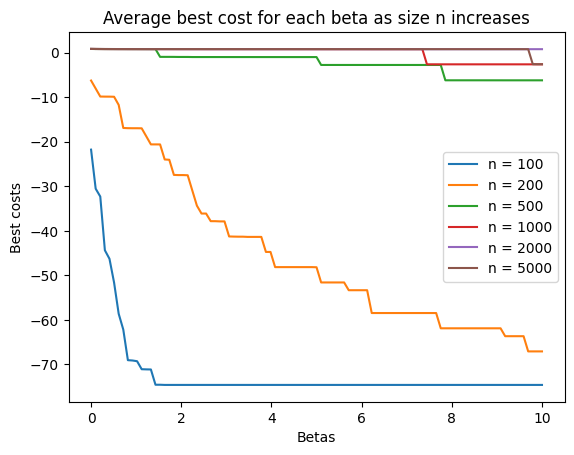

In [ ]:
plot_task4_2(betas, avg_costs, ns)

***Considerations (Fig.4)***

This confirms all the reasonings above, the drop in the cost is much more radical and defined in small ns, while it becomes less and less frequent when n increases.

#### **Task 5**

To study the behavior of acceptance probability in running our simulated annealing, we can rely on the measure of the accepted frequency instead of the probabilties, since they capture the same essence of the annealing scheme. Furthermore it's easier to implement a storage of acceptance frequency without modifying too much our function. To understand better how the acceptance rates are indicative of the landscape that we are trying to optimize, we can record also the average accepted delta costs in each annealing step.

##### **5.1 Setting and testing functions**

Constant variables in the study: anneal_steps=100, mcmc_steps = 200, beta0=0.1, beta1=10.


In [ ]:
### FUNCTION THAT RETURNS ALSO THE ACCEPTANCE FREQUENCIES AND AVG DELTA COSTS
def simann5(probl, beta0=0.1, beta1=10., anneal_steps=10, mcmc_steps=10, seed=None):

    if seed is not None:
        np.random.seed(seed)

    probl.init_config()
    cx = probl.cost()
    best_c = cx
    betas = np.zeros(anneal_steps)
    betas[:-1] = np.linspace(beta0, beta1, anneal_steps-1)
    betas[-1] = np.inf
    accepted_freq = np.zeros(anneal_steps)
    deltas = np.zeros(anneal_steps)

    for i in range(anneal_steps):
        beta = betas[i]
        accepted_moves = 0
        temp_delta = np.zeros(mcmc_steps)
        for t in range(mcmc_steps):
            move = probl.propose_move()
            delta_c = probl.compute_delta_cost(move)

            if accept_with_prob(delta_c, beta):
                temp_delta[t] = delta_c
                accepted_moves += 1
                probl.accept_move(move)
                cx += delta_c

                if best_c >= cx:
                    best_c = cx
        deltas[i] = np.mean(temp_delta)
        accepted_freq[i] = accepted_moves/mcmc_steps
    print(best_c)
    return accepted_freq, betas, deltas

## FUNCTION TO PLOT THE CHANGES IN DELTA COSTS AND THE ACCEPTANCE FREQUENCIES OVER BETAS
def plot_task5(betas, accepted_freq, deltas):
    # Create subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

    # Plot the first graph
    ax1.plot(betas, accepted_freq, label='Accepted frequency', color='blue')
    ax1.set_xlabel('Betas')
    ax1.set_ylabel('Accepted frequency (%)')
    ax1.legend()

    # Plot the second graph
    ax2.plot(betas, deltas, label='Average accepted delta costs over betas', color='green')
    ax2.set_xlabel('Betas')
    ax2.set_ylabel('Delta costs')
    ax2.legend()

    # Customize the layout
    plt.suptitle('Task 5')
    plt.show()

##### **5.2 Observations, plotting and specific descriptions of 2 instances**

- Being the inizialization of the process random, as well as the acceptance of a given move, the behavior of the acceptance frequency is different from run to run. But plotting the frequency over the change in betas for multiple runs we can define some common behaviors of the acceptance frequency.
- Most of the times there is a radical drop of the acceptance rate, after a relatively small amount of steps. Depending the acceptance probability by both beta (whose decrease is gradual) and the delta costs recorded (more accepted if delta cost is lower and vice versa), we can think that the drop in the acceptance rate corresponds to a big increase of the average delta cost calculated during the mcmc walk. This means that being our move local, our point has fallen in a hole and all the moves exiting the hole are being rejected, influencing in this way the acceptance rate.
- Looking also at the average **accepted** delta costs in those instances we can see that there is a drop too in correspondence of the drop in the acceptance rate, this confirms the fact that the point is fallen into a region of smaller cost. The frequency after some stabilizations eventually falls to zero as our exploration converges.
- Let's describe two specific instances to understand how position(landscape), deltas and acceptance frequencies can be related.

**EXAMPLE 1 (Fig.5)**

In [ ]:
accepted_freq, betas, deltas = simann5(probl, 0.1, 10, anneal_steps=100, mcmc_steps = 200, seed=453443444)

-102.92225940439302


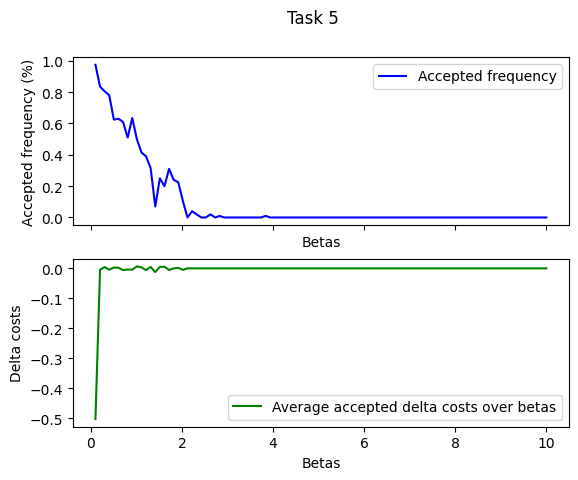

In [ ]:
plot_task5(betas, accepted_freq, deltas)


- The first one is described by the graph above, which captures the instance in which the starting point is near other points that share a similar cost, we can understand it by looking at the average delta costs in the mcmc runs. For the first 1/5th of the annealing steps there are small deltas with high acceptance frequency, this means that our point is moving in a region where the difference in the cost is not big and decreasing from time to time. This allows the movement and the exploring of the region, until it encounters a situation of drop in acceptance frequency and sharp decrease in accepted delta cost recorded. What happened? The point found a different region of the landscape where the cost drops (as the second graph hints). Once entered the region the move proposals going out of it will be rejected with near 100% probability, causing a drop in the rate of acceptance. After this drop, the accepted frequency continues its course with smaller values than a regular annealing procedure(where acceptance frequency decreases gradually only for the beta effect) because of a possible increase in the variance of costs in this new region. Then the point continues to move in this new region til it finds a very good position that  coupled with a bigger beta will kill definitely the acceptance rate and also the delta cost.

**EXAMPLE 2 (Fig.6)**

In [ ]:
accepted_freq, betas, deltas = simann5(probl, 0.1, 10, anneal_steps=100, mcmc_steps = 200, seed=6)

-102.92225940439302


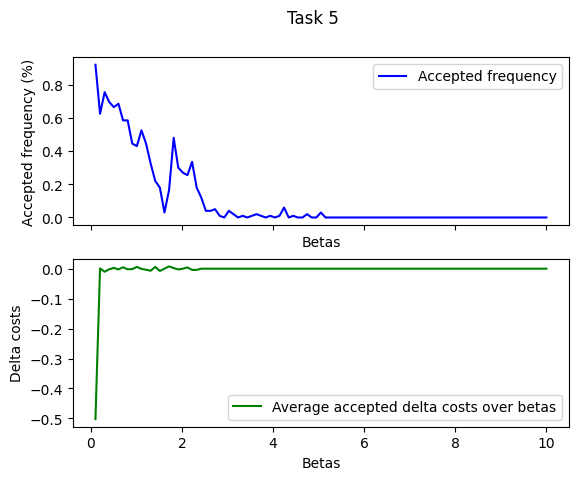

In [ ]:
plot_task5(betas, accepted_freq, deltas)


- In this instance instead the point starts in a very good position, because after the first annealing step our point experience immediately a fall in the acceptance frequency, but this time less radical. That's because the beta in correspondence of this drop is still low enough that can allow some bigger positive deltas jumps, then some non-optimal moves are still being accepted. The acceptance rate then tends to decrease as the delta costs stabilize around zero. The point continues to move, as the accepted frequency hints, until convergence

#### **Task 6**

##### **6.0 Visualization and description of the landscape (Fig 7-8)**

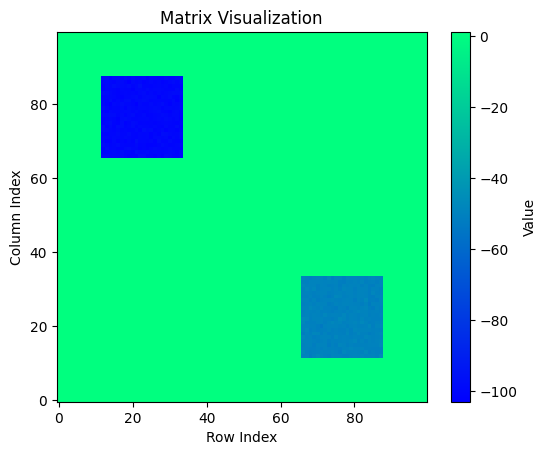

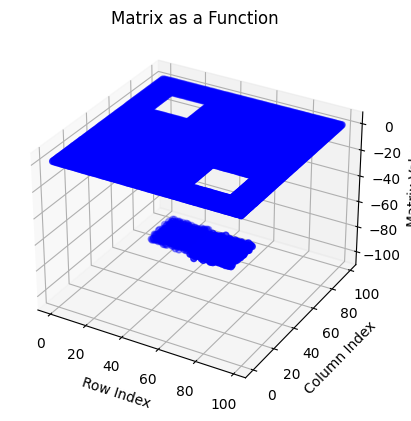

In [ ]:
## FUNCTIONS TO VISUALIZE THE MATRIX IN 2D AND 3D
def visualize_data2D(data):
    matrix = np.transpose(data) ## TRANSPOSED BECAUSE IN THIS WAY ROW INDEX IN ON THE X AXIS AND COL INDEX ON THE Y-AXIS
    plt.imshow(matrix, cmap='winter', origin="lower")
    plt.colorbar(label='Value')
    plt.xlabel('Row Index')
    plt.ylabel('Column Index')
    plt.title('Matrix Visualization')
    plt.show()

def visualize_data3D(data):
    matrix = data

    # Get the indices and values from the matrix
    indices = np.array(list(np.ndindex(matrix.shape)))
    values = matrix.flatten()

    # Create a 3D scatter plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot the points
    ax.scatter(indices[:, 0], indices[:, 1], values, c='blue')

    # Add labels and title
    ax.set_xlabel('Row Index')
    ax.set_ylabel('Column Index')
    ax.set_zlabel('Matrix Value')
    ax.set_title('Matrix as a Function')

    # Show the plot
    plt.show()

visualize_data2D(data)
visualize_data3D(data)

The output remains constant and hovers close to zero across a wide range of input values. However, there are two distinct surfaces in this landscape corresponding to values much smaller than 0: one at around -100 and another around -50. Within these surfaces the value of the function does not vary much.

This is a landscape very much anticipated by the observations on the other points. Looking at the acceptance frequency we understood how the function presented sharp decreases in its values and also regions of very similar costs. While studying the change in the best cost found in each annealing step, we captured the rapid descent of our point from a zero value to an average of -80. We could not predict the exact numbers or actual values of the local minima found without returning the results of the function, (but we were able to understand that our function had a minimum around the -80 value. ) non so

In the following sections we will check separately the observations made in Task 5 and Task 3. Plotting the explicit trajectory of a specific run of the algorithm we will evaluate the predictions made in the tasks' sections.

##### **6.1 Accepted Frequency check**

In [ ]:
## FUNCTION THAT RETURNS ACC_FREQ, BETAS AND DELTAS AND ALSO STORES THE EXPLORED NODES
def simann6(probl, beta0=0.1, beta1=10., anneal_steps=10, mcmc_steps=10, seed=None):

    if seed is not None:
        np.random.seed(seed)

    probl.init_config()
    cx = probl.cost()
    best_c = cx
    betas = np.zeros(anneal_steps)
    betas[:-1] = np.linspace(beta0, beta1, anneal_steps-1)
    betas[-1] = np.inf

    accepted_freq = np.zeros(anneal_steps)
    deltas = np.zeros(anneal_steps)
    x_path = []
    y_path = []

    for i in range(anneal_steps):
        beta = betas[i]
        accepted_moves = 0
        temp_delta = np.zeros(mcmc_steps)
        for t in range(mcmc_steps):
            move = probl.propose_move()
            delta_c = probl.compute_delta_cost(move)

            if accept_with_prob(delta_c, beta):
                temp_delta[t] = delta_c
                accepted_moves += 1
                probl.accept_move(move)
                cx += delta_c
                x, y = move
                x_path.append(x)
                y_path.append(y)
                if best_c >= cx:
                    best_c = cx
        deltas[i] = np.mean(temp_delta)
        accepted_freq[i] = accepted_moves/mcmc_steps
    print(best_c)
    return accepted_freq, betas, deltas, x_path, y_path

### FUNCTION TO PLOT THE TRAJECTORY OF THE POINTS WHERE THE DELTACOST WAS CALCULATED
def plot_trajectory(x_path, y_path, data):
    plt.figure()
    matrix = np.transpose(data) ## TRANSPOSED BECAUSE IN THIS WAY ROW INDEX IN ON THE X AXIS AND COL INDEX ON THE Y-AXIS
    plt.imshow(matrix, cmap='winter', origin="lower")
    plt.colorbar(label='Value')
    plt.xlabel('Row Index')
    plt.ylabel('Column Index')
    plt.title('Scatter Plot with Trajectory')
    # Create an array of indices corresponding to the order of x-values and reverse it

    indices = np.arange(len(x_path))[::-1]

    # Set up a colormap
    colormap = plt.cm.hot

    # Plot the scatter plot with varying colors based on the order of x-values
    scatter = plt.scatter(x_path, y_path, c=indices, cmap=colormap, edgecolor='black')

    # Add a colorbar to show the mapping between colors and order of x-values
    cbar = plt.colorbar(scatter, ticks=np.arange(max(indices), min(indices), 30))
    cbar.set_label('Trajectory')

    plt.show()

## FUNCTION TO PLOT THE CHANGES IN DELTA COSTS AND THE ACCEPTANCE FREQUENCIES OVER BETAS FROM TASK 5
def plot_task5(betas, accepted_freq, deltas):
    # Create subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

    # Plot the first graph
    ax1.plot(betas, accepted_freq, label='Accepted frequency', color='blue')
    ax1.set_xlabel('Betas')
    ax1.set_ylabel('Accepted frequency (%)')
    ax1.legend()

    # Plot the second graph
    ax2.plot(betas, deltas, label='Delta costs over betas', color='green')
    ax2.set_xlabel('Betas')
    ax2.set_ylabel('Delta costs')
    ax2.legend()

    # Customize the layout
    plt.suptitle('Task 5')
    plt.show()

**Example 1 (Fig.9)**

In [ ]:
accepted_freq, betas, deltas, x_path, y_path = simann6(probl, 0.1, 10, anneal_steps=100, mcmc_steps = 200, seed=453443444)

-102.92225940439302


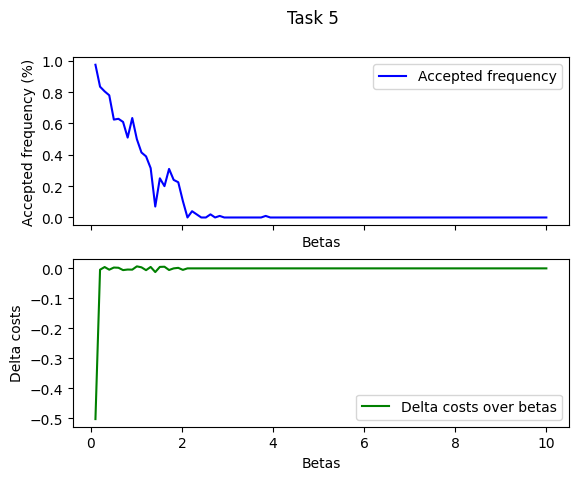

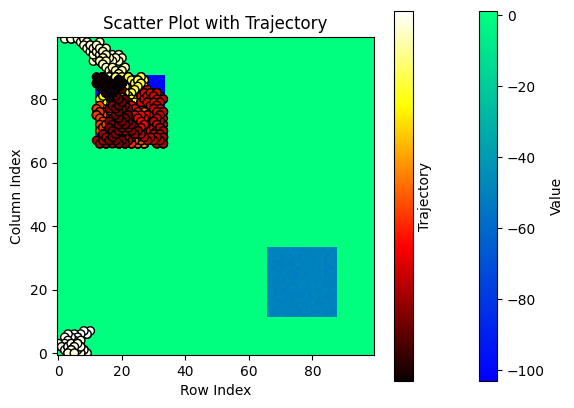

In [ ]:
plot_task5(betas, accepted_freq, deltas)
plot_trajectory(x_path, y_path, data)

This is the same case as the first one described in the Task5, and all our description matches the trajectory plot. The starting point is not in a very good position, then we explore a portion with small variations in the value of the function, when suddenly the point falls into a condition of good minimum and stays there until it converges.

**Example 2 (Fig.10)**

In [ ]:
accepted_freq, betas, deltas, x_path, y_path = simann6(probl, 0.1, 10, anneal_steps=100, mcmc_steps = 200, seed=6)

-102.92225940439302


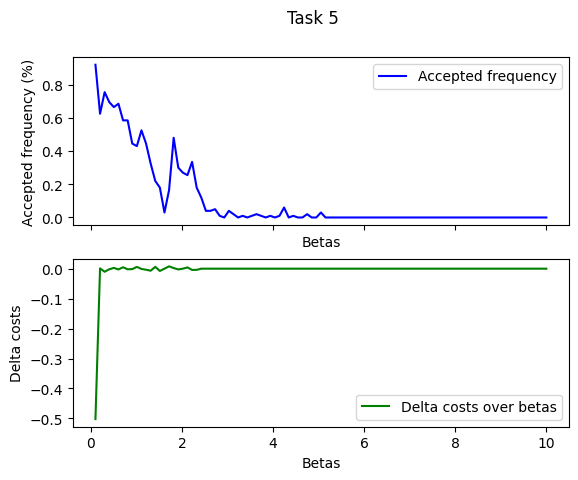

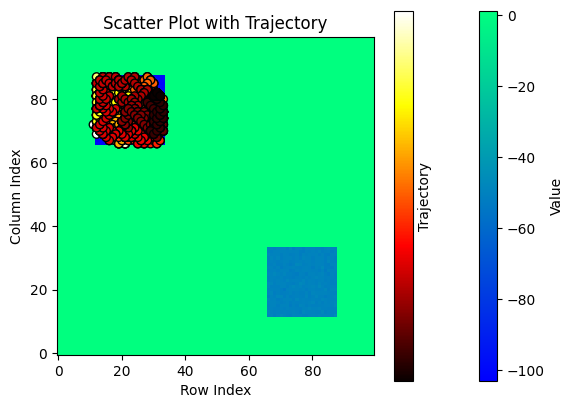

In [ ]:
plot_task5(betas, accepted_freq, deltas)
plot_trajectory(x_path, y_path, data)

This is instead the same case described by the second instance of Task5, and our predictions are correct here too. The point start in a good position, after 1 step it falls into a good value of minimum and converges to a value very similar to the one after the drop.

##### **6.2 Temperature check (Fig.11)**

In [ ]:
### SIMULATED ANNEALING FUNCTION THAT RETURNS COSTS AT EACH BETA AND STORES PATH OF BEST COSTS(FROM TASK 3)
def simann_6_2(probl, beta0=0.001, beta1=10., anneal_steps=100, mcmc_steps=200, seed=None):
    if seed is not None:
        np.random.seed(seed)

    probl.init_config()
    cx = probl.cost()

    ## UNCOMMENT TO PRINT THE STARTING COORDINATES
    # print(probl.x0, probl.y0)

    best_c = cx

    betas = np.zeros(anneal_steps)
    betas[:-1] = np.linspace(beta0, beta1, anneal_steps-1)
    betas[-1] = np.inf
    costs = []
    x_path = []
    y_path = []

    for beta in betas:
        accepted_moves = 0
        temp_costs = []
        for t in range(mcmc_steps):
            move = probl.propose_move()
            delta_c = probl.compute_delta_cost(move)

            if accept_with_prob(delta_c, beta):
                accepted_moves += 1
                probl.accept_move(move)
                cx += delta_c
                # temp_costs.append(cx)

                if best_c >= cx:
                    best_c = cx
                    x, y = move
                    x_path.append(x)
                    y_path.append(y)
        # costs.append(np.mean(np.array(temp_costs)))
        costs.append(best_c)
        ## UNCOMMENT TO PRINT THE CHANGE AFTER EACH ITERATION
        # print(f"beta= {beta}, accept_freq= {accepted_moves/mcmc_steps}, best_c={best_c}")

    return x_path, y_path, betas, costs

### FUNCTION TO PLOT THE TRAJECTORY OF THE POINTS WHERE THE DELTACOST WAS CALCULATED
def plot_trajectory(x_path, y_path, data):
    plt.figure()
    matrix = np.transpose(data) ## TRANSPOSED BECAUSE IN THIS WAY ROW INDEX IN ON THE X AXIS AND COL INDEX ON THE Y-AXIS
    plt.imshow(matrix, cmap='winter', origin="lower")
    plt.colorbar(label='Value')
    plt.xlabel('Row Index')
    plt.ylabel('Column Index')
    plt.title('Scatter Plot with Trajectory')
    # Create an array of indices corresponding to the order of x-values and reverse it

    indices = np.arange(len(x_path))[::-1]

    # Set up a colormap
    colormap = plt.cm.hot

    # Plot the scatter plot with varying colors based on the order of x-values
    scatter = plt.scatter(x_path, y_path, c=indices, cmap=colormap, edgecolor='black')

    # Add a colorbar to show the mapping between colors and order of x-values
    cbar = plt.colorbar(scatter, ticks=np.arange(max(indices), min(indices), 30))
    cbar.set_label('Trajectory')

    plt.show()

### FUNCTION THAT PLOTS THE COSTS AT EACH BETA (FROM TASK 3)
def plot_task3(betas, costs):
    plt.plot(betas, costs, color="purple", linestyle='-', linewidth=2, markersize=8, label='Costs')
    plt.xlabel("Betas")
    plt.ylabel("Cost")
    plt.title("Best Cost at Each Temperature of the Annealing Procedure")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()

In [ ]:
x_path, y_path, betas, costs = simann_6_2(probl, beta0=0.001, beta1=10., anneal_steps=100, mcmc_steps=200, seed=None)

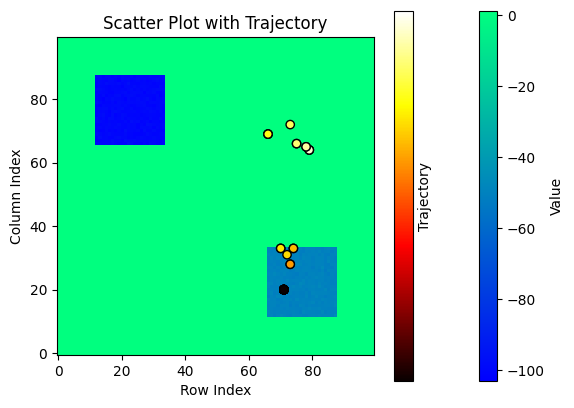

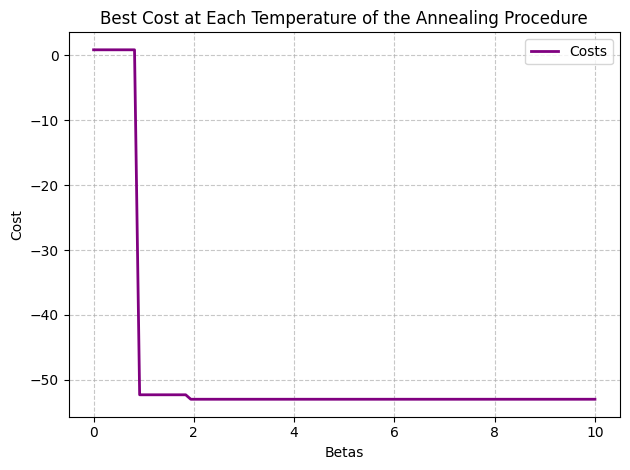

In [ ]:
plot_trajectory(x_path, y_path, data)
plot_task3(betas, costs)

Here with this example we can see how the observations made in task 3 are correct, our point starts generally on a position where after few annealing steps (and best cost updates) it falls into a region where the costs are very similar and much lower than the starting best costs. This drop happens in the very first annealing steps for the size we are studying (n=100) and the cost found is in this instance -50, but with different starting position could have been the other hole of -100.
We can conclude that the data gathered by our algorithms both in task 3 and task 5 helped us in the understanding of the landscape to be explored for the problem, and gave us hints to predict correctly the behavior of the function with good precision.

#### **Task 7**

##### **7.0 Starting considerations and testing functions**

The greedy algorithm is definitely worse performance-wise with respect to simulated annealing, because its exploration gets stopped at the first situation of local minimum, then does not permit a more broad exploration. Issue that is not present in the simulated annealing, which gradually becomes more greedy as the annealing steps go on. In the next 2 sections we will compare the two algorithms both in one single iteration and also for multiple reiniziatizations.


In the third section we will have a new proposal to solve this specific problem with better performances

***Testing functions***

In [ ]:
### GREEDY
def greedy(probl, repeats=1, num_iters = 10, seed = None):
    best_cost = np.inf
    best_probl = probl.copy()

    for i in range(repeats):
        if seed is not None:
            np.random.seed(seed)

        x = probl.init_config()
        cx = probl.cost()

        for t in range(num_iters):
            move = probl.propose_move() # TODO
            delta_c = probl.compute_delta_cost(move)

            if delta_c <= 0:
                probl.accept_move(move)
                cx += delta_c

        if cx < best_cost:
            best_cost = cx
            best_probl = probl.copy()
            # probl.display()
            # print(f"New cost = {best_cost}")

    return best_probl, best_cost

### SIMULATED ANNEALING
def simann7(probl, repeats=1, beta0=0.1, beta1=10., anneal_steps=10, mcmc_steps=10, seed=None):
    if seed is not None:
        np.random.seed(seed)
    best_c = np.inf
    betas = np.zeros(anneal_steps)
    betas[:-1] = np.linspace(beta0, beta1, anneal_steps-1)
    betas[-1] = np.inf

    for i in range(repeats):
        probl.init_config()
        cx = probl.cost()

        for beta in betas:

            for t in range(mcmc_steps):
                move = probl.propose_move()
                delta_c = probl.compute_delta_cost(move)

                if accept_with_prob(delta_c, beta):
                    probl.accept_move(move)
                    cx += delta_c
                    # coord = probl.x0, probl.y0
                    # print(f"Coordinates explored = {coord}")

                    if best_c >= cx:
                        best_c = cx


            # UNCOMMENT TO PRINT VARIABLES DURING THE RUN
            # print(f"beta= {beta}, best_c={best_c}")

    # print(f"Best Cost = {best_c}")
    return best_c

### FUNCTION THAT GET RESULTS FOR N ITERATIONS
def run_experiments(iterations=100, greedy_num_iters =100, repeats=1, beta0=0.1, beta1=10., anneal_steps=10, mcmc_steps=10):
    probl = OPT(data)

    greedy_results = np.zeros(iterations)
    simann_results = np.zeros(iterations)
    greedy_times = np.zeros(iterations)
    simann_times = np.zeros(iterations)

    for i in range(iterations):
        t0 = time.time()
        prob, cost = greedy(probl, num_iters=greedy_num_iters, repeats=repeats)
        greedy_results[i] = cost
        t1 = time.time()
        greedy_times[i] = t1-t0

        t0 = time.time()
        cost = simann7(probl, repeats=repeats, beta0=beta0, beta1=beta1, anneal_steps=anneal_steps, mcmc_steps=mcmc_steps)
        simann_results[i] = cost
        t1 = time.time()
        simann_times[i] = t1-t0

    return greedy_results, simann_results, greedy_times, simann_times

### FUNCTION THAT PLOTS THE RESULTS OF THE TWO ALGORITHMS
def plot_results(greedy_results, simann_results):
    iterations = len(greedy_results)
    x_values = range(1, iterations + 1)
    plt.figure(figsize=(6, 3))
    plt.plot(x_values, greedy_results, label='Greedy', color="green")
    plt.plot(x_values, simann_results, label='Simulated Annealing', color="dodgerblue")
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Comparison of Greedy and Simulated Annealing Algorithms')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(True)
    plt.show()

### FUNCTION THAT PLOTS THE RESULTS AND HIGHLIGHT THE OPTIMAL MINIMUM
def plot_values_and_highlight(arr1, arr2, n):
    indices1 = np.where(abs(arr1-n) < 1e-12)[0]
    indices2 = np.where(abs(arr2-n) < 1e-12)[0]
    plt.figure(figsize=(6, 3))
    plt.plot(arr1, label='Greedy results highlighted minimum', c="green")
    plt.plot(arr2, label='Simann results highlighted minimum', c="dodgerblue")
    plt.scatter(indices1, arr1[indices1], marker="X", color='blue', s=25, label=f'Greedy optimal results')
    plt.scatter(indices2, arr2[indices2], marker="o", color='red', s=25, label=f'Simann optimal results')
    plt.xlabel('Iteration')
    plt.ylabel('Results')
    plt.title(f'Greedy vs. Simann results')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(True)
    plt.show()

### FUNCTION THAT PLOTS THE TIME RESULTS OF THE TWO ALGORITHMS
def plot_results_times(greedy_times, simann_times):
    iterations = len(greedy_times)
    x_values = range(1, iterations + 1)
    plt.figure(figsize=(6, 3))
    plt.plot(x_values, greedy_times, label='Greedy', c="green")
    plt.plot(x_values, simann_times, label='Simulated Annealing', c="dodgerblue")
    plt.xlabel('Iterations')
    plt.ylabel('Execution time')
    plt.title('Time comparison of Greedy and Simulated Annealing Algorithms')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(True)
    plt.show()

### FUNCTION THAT MAKES EXPERIMENTS FOR DIFFERENT NS
def run_experiments2(ns, iterations=1, greedy_num_iters=100, repeats=1, beta0=0.1, beta1=10., anneal_steps=10, mcmc_steps=10):
    l = len(ns)
    probls_ns = [OPT(generate_data(n, "3216378")) for n in ns]
    avg_greedy_results = np.zeros(l)
    avg_simann_results = np.zeros(l)
    avg_greedy_times = np.zeros(l)
    avg_simann_times = np.zeros(l)

    for i in range(l):

        greedy_results = np.zeros(iterations)
        simann_results = np.zeros(iterations)
        greedy_times = np.zeros(iterations)
        simann_times = np.zeros(iterations)

        for j in range(iterations):
            t0 = time.time()
            prob, cost = greedy(probls_ns[i], num_iters=greedy_num_iters, repeats=repeats)
            greedy_results[j] = cost
            t1 = time.time()
            greedy_times[j] = t1-t0

            t0 = time.time()
            cost = simann7(probls_ns[i], repeats=repeats, beta0=beta0, beta1=beta1, anneal_steps=anneal_steps, mcmc_steps=mcmc_steps)
            simann_results[j] = cost
            t1 = time.time()
            simann_times[j] = t1-t0

        avg_greedy_results[i] = np.mean(greedy_results)
        avg_simann_results[i] = np.mean(simann_results)
        avg_greedy_times[i] = np.mean(greedy_times)
        avg_simann_times[i] = np.mean(simann_times)

    return avg_greedy_results, avg_simann_results, avg_greedy_times, avg_simann_times


##### **7.1 Greedy vs. Simulated annealing one repetition comparison**

***Generate results of both algorithms for 100 runs***

In [ ]:
## AROUND 40 SECONDS TO RUN
iterations = 100
greedy_results, simann_results, greedy_times, simann_times = run_experiments(iterations, greedy_num_iters=100, repeats=1, beta0=0.1, beta1=10., anneal_steps=100, mcmc_steps=200)


***Plot the data found (Fig. 12)***

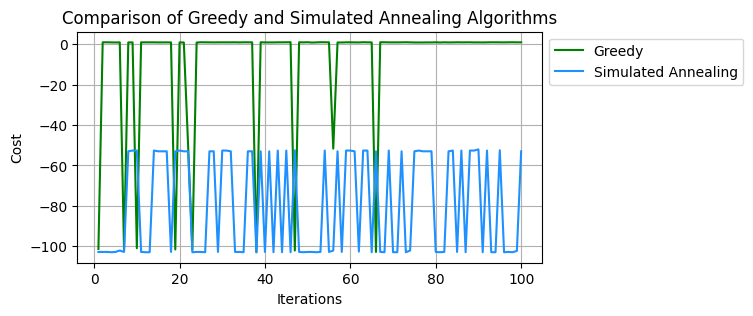

In [ ]:
plot_results(greedy_results, simann_results)

In [ ]:
# AVERAGE BEST COST FOUND BY EACH ALGORITHM IN 100 RUNS
print(f"Mean result for greedy = {np.mean(greedy_results)}")
print(f"Mean result for simulated annealing = {np.mean(simann_results)}")

Mean result for greedy = -8.322202701047054
Mean result for simulated annealing = -79.28771034791714


***Considerations***

We can see both by the graph and the mean results that with only one repetition the simulated annealing performs much better. As observed in the initial considerations, the greedy strategy does not allow non-optimal jumps, therefore it gets easily stopped in a local minimum situation where it is impossible to escape.

##### **7.2 Greedy vs. Simulated annealing multiple repetition comparison**

***Generate the results for 100 runs for each algorithm (with 10 repeats each)***

In [ ]:
iterations = 100
greedy_results2, simann_results2, greedy_times2, simann_times2 = run_experiments(iterations, repeats=10, greedy_num_iters=100, beta0=0.1, beta1=10., anneal_steps=100, mcmc_steps=100)

***Plot the data for 100 runs (Fig. 13)***

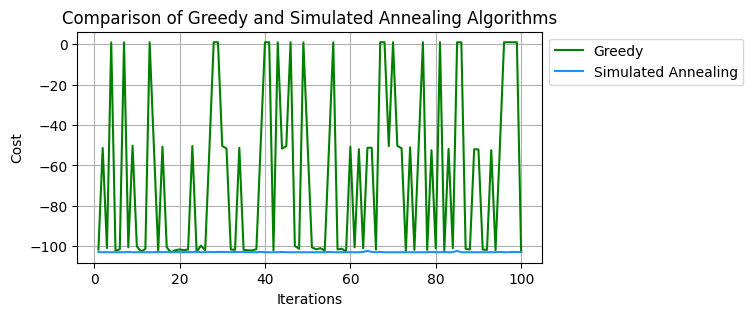

In [ ]:
plot_results(greedy_results2, simann_results2)

In [ ]:
# AVERAGE BEST COST FOUND BY EACH ALGORITHM IN 100 RUNS
print(f"Mean result for greedy = {np.mean(greedy_results2)}")
print(f"Mean result for simulated annealing = {np.mean(simann_results2)}")

Mean result for greedy = -64.39254440587636
Mean result for simulated annealing = -102.87221990463624


***Considerations***

We can see in this case how the simulated annealing performed multiple times outperforms fully the greedy strategy, having an average result very very close to the optimal minimum. But how accurate are the two algorithms? Do they reach the exact minimum? If yes, what's the accuracy rate of the algorithms? Let's see it in the following section.

###### **Accuracy**

***Visualize the optimal minimum for 100 iterations, Greedy vs. Simann (Fig. 14)***

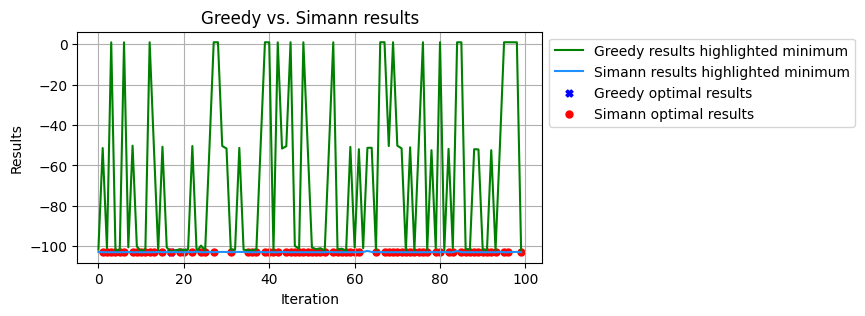

In [ ]:
n = np.min(data)
plot_values_and_highlight(greedy_results2, simann_results2, n)

In [ ]:
# PROPORTIONS OF OPTIMAL RESULTS WITH 100 ITERATIONS
opt1 = len(np.where(abs(greedy_results2-n) < 1e-12)[0])
opt2 = len(np.where(abs(simann_results2-n) < 1e-12)[0])
print(f"Optimal results proportion for Greedy for 100 iterations= {(opt1/iterations)*100}%")
print(f"Optimal results proportion for Simann for 100 iterations= {(opt2/iterations)*100}%")


Optimal results proportion for Greedy for 100 iterations= 1.0%
Optimal results proportion for Simann for 100 iterations= 73.0%


As expected, again simulated annealing is better, with a really good accuracy rate of almost 50% over 100 iterations. Then repeating the simulated annealing for multiple  times and storing the best results is definitely the best alternative from the two. But it comes with a cost in efficiency, let's analyze in the next section the time of execution of the two algorithms.

###### **Time of execution**

***Plot the results(Fig.15)***

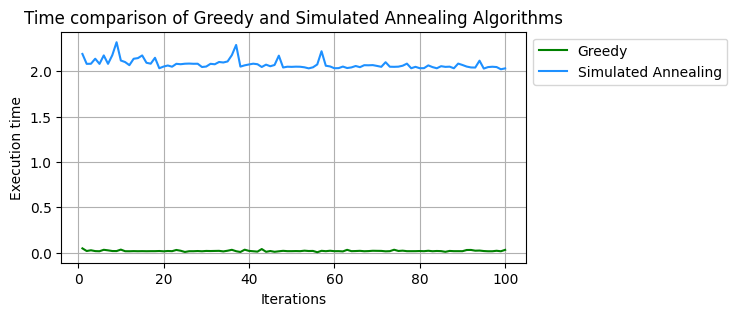

In [ ]:
plot_results_times(greedy_times2, simann_times2)

In [ ]:
# PRINT THE MEAN EXECUTION TIMES
print(f"Mean execution time for greedy = {np.mean(greedy_times2)}")
print(f"Mean execution time for simulated annealing = {np.mean(simann_times2)}")

Mean execution time for greedy = 0.019150426387786867
Mean execution time for simulated annealing = 2.077668917179108


Simulated annealing having an higher time complexity takes much more time to run. Then the precision of the simann comes with a cost of time. Tradeoff that is definitely worth it in the size n=100, because the performance are very very good and the time difference is in seconds, but when we go to higher sizes of the problem, how are the solutions of the simulated annelaling going to scale?

###### **As n increases**

***Collect data of the average result over 20 iterations (of 10 repeats each) for different sizes of the problem***

In [ ]:
## AROUND 4 MINUTES TO RUN
ns = [100, 300, 500, 1000, 2000, 5000]
avg_greedy_results, avg_simann_results, avg_greedy_times, avg_simann_times = run_experiments2(ns, iterations=20, repeats=10, greedy_num_iters=100, beta0=0.1, beta1=10., anneal_steps=100, mcmc_steps=100)

***Plot the average results for each n (Fig.16)***

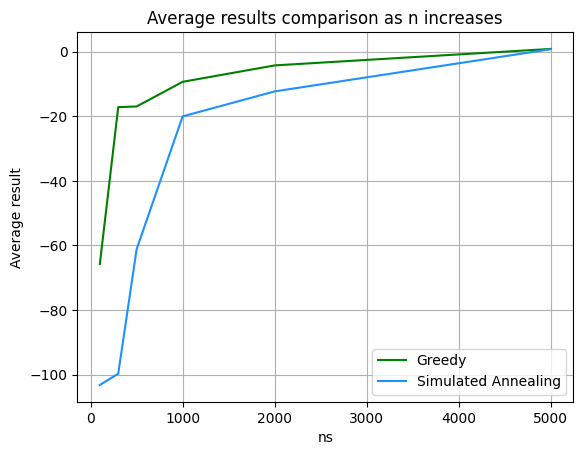

In [ ]:
plt.plot(ns, avg_greedy_results, label='Greedy', c="green")
plt.plot(ns, avg_simann_results, label='Simulated Annealing', c="dodgerblue")
plt.xlabel('ns')
plt.ylabel('Average result')
plt.title('Average results comparison as n increases')
plt.legend()
plt.grid(True)
plt.show()

***Plot the average time of execution for each n (Fig.17)***

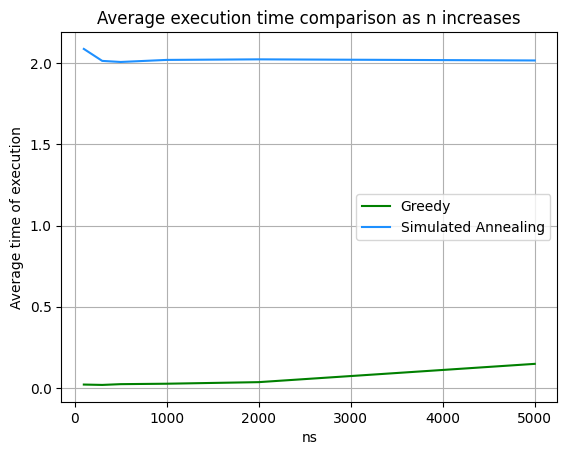

In [ ]:
plt.plot(ns, avg_greedy_times, label='Greedy', c="green")
plt.plot(ns, avg_simann_times, label='Simulated Annealing', c="dodgerblue")
plt.xlabel('ns')
plt.ylabel('Average time of execution')
plt.title('Average execution time comparison as n increases')
plt.legend()
plt.grid(True)
plt.show()

Simulated annealing performances decrease with increasining ns, in fact maintaining the same steps the space to explore becomes bigger and bigger, leaving the process small chances to get to a good minimum if we increase in size the problem. This is the same observations made in task 4, simulated annealing  will struggle more and more as the size of the problem increases, even if reinitialized more times (like we did this time).

We can conclude that reinitializing the simulated annealing 10 times and storing the best result, it will give us a very good result (on avg around -102) with 2 seconds of computations in the case of small sizes of the problem (around 100) but it's not effective with higher sizes. We could try to lower down the computational cost by tweaking the variables of the annealing procedure but this we won't have huge improvement mantaining the same accuracy. To improve the speed of the algorithm we need to change the move proposal of our class. Doing that, also reiniziatization would not be necessary, since if the proposal is far enough our point could jump from parts to parts of the landscape without the need to be reinizialized. In the next section we will explore this alternative solution and record the improvements.

##### **7.3 Simulated Annealing with adaptive proposal move**

Simulated annealing is a decent algorithm when solving the problem for small sizes, having a good convergence success rate of around 50 % (as seen in task 4). The problems of the algorithm are 2: the consistency of the result and the scalability of the process as n increases. For the consistency, we can implement a version of simulated annealing that is reinitialized multiple times, so that it can compare the results of different runs and return the best. In this way the success rate increases (100% convergence rate and around 50% accuracy) as well as the average result (around -102). Doing that, the second problem still perstists: poorer results as ns get bigger. We cannot solve this issue mantaining the step proposal equal to 1 (as the assignment suggest) since when n increases the space to explore becomes bigger and bigger and maintaining the number of annealing/mcmc steps (then also the time of execution) constant we cannot guarantee a good result. The outcome in fact changes if we modify the proposal move with a random choice of the index which is totally random inside the matrix excluding the current coordinates. In this way our algorithm has more freedom to jump from one point to another keeping track of best costs. This will also prevent the time consumption of reinizializing the process, since now our point is fully capable of jumping around without any effort. What's the cost of this change? The dependency on the landscape that we are studying. This proposal is powerful only if there are small number of limited regions with similar costs, then guessing a new position in the whole landscape has high probability to catch a better position. If instead the landscape was much more eterogeneous, guessing won't give us any advantage.

In this section we will explore another solution that exploits a variation of the proposed move that will allow a more broad exploration. Let's dig into the new algorithm and measure its performances with respect to the simulated annealing reinitialized 10 times.

***New class and test functions***

In [ ]:
### NEW CLASS WITH THE NEW PROPOSAL MOVE
class OPT2:
    def __init__(self, data):
        self.data = data
        self.n = data.shape[0]
        self.x0 = -1
        self.y0 = -1

    def init_config(self, seed=None):
        if seed is not None:
            np.random.seed(seed)
        self.x0 = np.random.choice(np.arange(self.n))
        self.y0 = np.random.choice(np.arange(self.n))

    def cost(self):
        return self.data[self.x0, self.y0]

    def propose_move_adaptive(self):
        i = self.x0
        j = self.y0
        n = self.data.shape[0]
        range = np.arange(n)
        while True:
            x_prop = np.random.choice(range)
            y_prop = np.random.choice(range)
            if x_prop != i or y_prop != j:
                break
        return x_prop, y_prop

    def propose_move(self):
        i = self.x0
        j = self.y0
        n = self.data.shape[0]
        x_prop = np.random.choice([(i-1) % n, (i+1) % n])
        y_prop = np.random.choice([(j-1) % n, (j+1) % n])
        return x_prop, y_prop

    def compute_delta_cost(self, move):
        x_prop, y_prop = move
        old_c = self.cost()
        new_c = self.data[x_prop, y_prop]
        return new_c - old_c

    def accept_move(self, move):
        x_prop, y_prop = move
        self.x0 = x_prop
        self.y0 = y_prop

    def copy(self):
        return deepcopy(self)

    # def display(self):
    #     plt.clf()
    #     data = self.data
    #     x0 = self.x0
    #     y0 = self.y0
    #     visualize_data2D_point(data, x0, y0)
    #     plt.show()
    #     plt.pause(0.01)

### NEW SIMANN THAT TAKES THE POSSIBILITY TO CHANGE THE STEP
def simann7_1(probl, adaptive= False, repeats=1, beta0=0.1, beta1=10., anneal_steps=10, mcmc_steps=10, seed=None):
    if seed is not None:
        np.random.seed(seed)
    best_c = np.inf
    betas = np.zeros(anneal_steps)
    betas[:-1] = np.linspace(beta0, beta1, anneal_steps-1)
    betas[-1] = np.inf

    for i in range(repeats):
        probl.init_config()
        cx = probl.cost()

        for beta in betas:

            for t in range(mcmc_steps):

                if adaptive:
                    move = probl.propose_move_adaptive()
                else:
                    move = probl.propose_move()

                delta_c = probl.compute_delta_cost(move)

                if accept_with_prob(delta_c, beta):
                    probl.accept_move(move)
                    cx += delta_c
                    # coord = probl.x0, probl.y0
                    # print(f"Coordinates explored = {coord}")

                    if best_c >= cx:
                        best_c = cx


            # UNCOMMENT TO PRINT VARIABLES DURING THE RUN
            # print(f"beta= {beta}, best_c={best_c}")

    # print(f"Best Cost = {best_c}")
    return best_c

### NEW FUNCTION TO GET DATA FROM ALGORITHMS ADAPTIVE VS STANDARD
def run_experiments4(probl, iterations=100, repeats=1, beta0=0.1, beta1=10., anneal_steps=100, mcmc_steps=100):

    ada_results = np.zeros(iterations)
    simann_results = np.zeros(iterations)
    ada_times = np.zeros(iterations)
    simann_times = np.zeros(iterations)

    for i in range(iterations):
        t0 = time.time()
        cost = simann7_1(probl, adaptive=True, beta0=beta0, beta1=beta1, anneal_steps=anneal_steps, mcmc_steps=mcmc_steps)
        ada_results[i] = cost
        t1 = time.time()
        ada_times[i] = t1-t0

        t0 = time.time()
        cost = simann7_1(probl, adaptive=False, repeats=repeats, beta0=beta0, beta1=beta1, anneal_steps=anneal_steps, mcmc_steps=mcmc_steps)
        simann_results[i] = cost
        t1 = time.time()
        simann_times[i] = t1-t0

    return ada_results, simann_results, ada_times, simann_times

### FUNCTION TO PLOT THE SOLUTIONS OF THE ALGORITHM
def plot_results2(ada_results, simann_results):
    iterations = len(ada_results)
    x_values = range(1, iterations + 1)
    plt.figure(figsize=(6, 3))
    plt.plot(x_values, ada_results, label='Adaptive', c="red")
    plt.plot(x_values, simann_results, label='Standard', c="dodgerblue")
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Comparison of adaptive and standard Simulated Annealing Algorithms')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(True)
    plt.show()

### FUNCTION TO PLOT THE DIFFERENCE IN TIMES
def plot_results_times2(ada_results, simann_times):
    iterations = len(ada_results)
    x_values = range(1, iterations + 1)
    plt.figure(figsize=(6, 3))
    plt.plot(x_values, ada_results, label='Adaptive', c="r")
    plt.plot(x_values, simann_times, label='Simulated Annealing', c="dodgerblue")
    plt.xlabel('Iterations')
    plt.ylabel('Execution time')
    plt.title('Time comparison of adaptive and standard Simulated Annealing Algorithms')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(True)
    plt.show()

### FUNCTION THAT MAKES EXPERIMENTS FOR DIFFERENT NS
def run_experiments5(ns, iterations=1, repeats=1, beta0=0.1, beta1=10., anneal_steps=10, mcmc_steps=10):
    l = len(ns)
    probls_ns = [OPT2(generate_data(n, "3216378")) for n in ns]
    avg_ada_results = np.zeros(l)
    avg_simann_results = np.zeros(l)
    avg_ada_times = np.zeros(l)
    avg_simann_times = np.zeros(l)

    for i in range(l):

        ada_results = np.zeros(iterations)
        simann_results = np.zeros(iterations)
        ada_times = np.zeros(iterations)
        simann_times = np.zeros(iterations)

        for j in range(iterations):
            t0 = time.time()
            cost = simann7_1(probls_ns[i], adaptive=True, beta0=beta0, beta1=beta1, anneal_steps=anneal_steps, mcmc_steps=mcmc_steps)
            ada_results[j] = cost
            t1 = time.time()
            ada_times[j] = t1-t0

            t0 = time.time()
            cost = simann7_1(probls_ns[i], adaptive=False, repeats=repeats, beta0=beta0, beta1=beta1, anneal_steps=anneal_steps, mcmc_steps=mcmc_steps)
            simann_results[j] = cost
            t1 = time.time()
            simann_times[j] = t1-t0

        avg_ada_results[i] = np.mean(ada_results)
        avg_simann_results[i] = np.mean(simann_results)
        avg_ada_times[i] = np.mean(ada_times)
        avg_simann_times[i] = np.mean(simann_times)

    return avg_ada_results, avg_simann_results, avg_ada_times, avg_simann_times

***Collect data for 100 iterations and 10 repeats of standard simulated annealing and only 1 repeat of the adaptive***

In [ ]:
### IT TAKES AROUND 4 MINUTES TO RUN
probl2 = OPT2(data)
ada_results, simann_results, ada_times, simann_times = run_experiments4(probl2, iterations=100, repeats=10, beta0=0.1, beta1=10., anneal_steps=100, mcmc_steps=100)

***Plot the results (Fig. 18-19)***

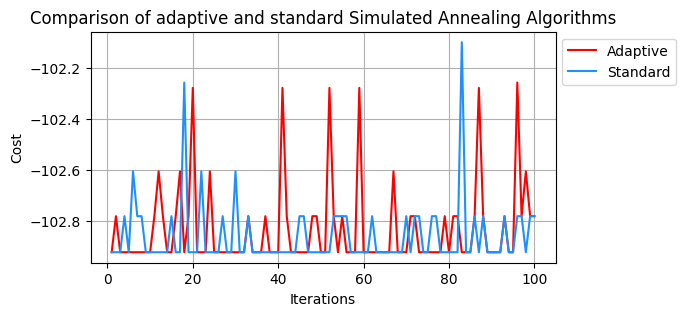

In [ ]:
plot_results2(ada_results, simann_results)

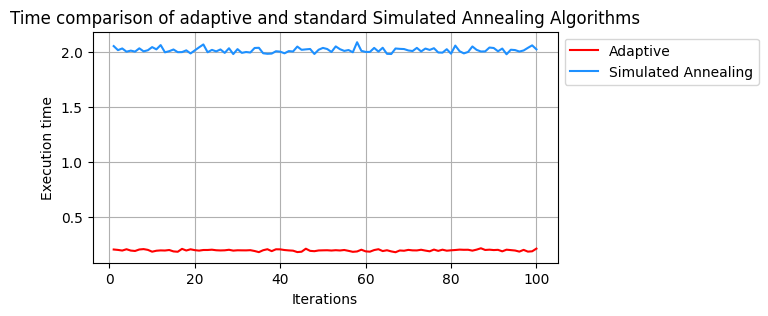

In [ ]:
plot_results_times2(ada_times, simann_times)

On 100 iterations and size n=100, we can clearly see the similarity of the results, that are not that different on average. The big breakthrough of the new algorithm is in the execution time (second graph) our new proposal in fact does not need a reiniziatization, it takes much less steps to reach a very good solution. Now let's see the performances with increasing problem complexity.

***As n increases what's the behavior of our new algorithm?***

In [ ]:
### AROUND 4 MINUTES TO RUN
ns = [100, 300, 500, 1000, 2000, 5000]
avg_ada_results, avg_simann_results, avg_ada_times, avg_simann_times = run_experiments5(ns, iterations=20, repeats=10, beta0=0.1, beta1=10., anneal_steps=100, mcmc_steps=100)

***Plot the results (Fig.20-21)***

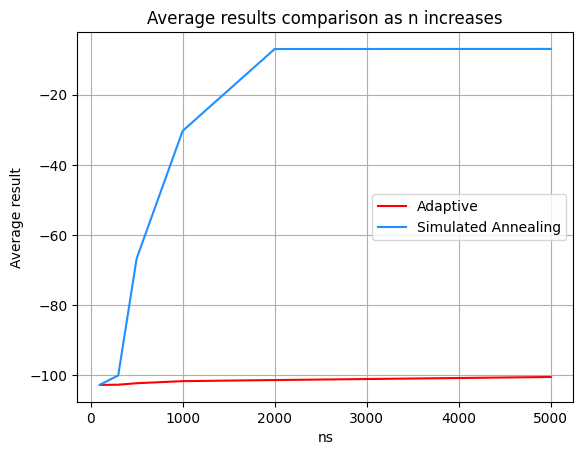

In [ ]:
plt.plot(ns, avg_ada_results, label='Adaptive', color="red")
plt.plot(ns, avg_simann_results, label='Simulated Annealing', color="dodgerblue")
plt.xlabel('ns')
plt.ylabel('Average result')
plt.title('Average results comparison as n increases')
plt.legend()
plt.grid(True)
plt.show()

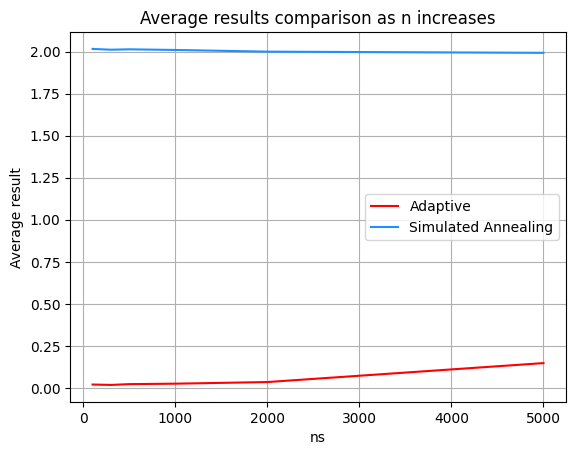

In [ ]:
plt.plot(ns, avg_greedy_times, label='Adaptive', c="r")
plt.plot(ns, avg_simann_times, label='Simulated Annealing', c="dodgerblue")
plt.xlabel('ns')
plt.ylabel('Average result')
plt.title('Average results comparison as n increases')
plt.legend()
plt.grid(True)
plt.show()

- Now the differences in the average results are drastic. Our new algorithm is able to find a very good solution on average even with very high sizes of the problem, this is still because our new proposal(given the landscape):  our exploration point can jump from one surface to the other without any effort.

Finally we can say that simulated annealing is definitely a better solution than greedy, even more powerful if reinitialized more times. However, maintaining the proposal move very local (distance 1) as the assignment text suggests, simulated annealing will always remain not scalable with the size of the problem because the explored space won't be enough to reach a minimum (without increasing the annealing steps, making the algorithm slower as the size increases).